In [1]:
from Graphs.plotFeatureImportanceGraph import plotFeatureImportance
from Graphs.plotFuturePredGraph import plotFuturePredictions
from Graphs.plotLossGraph import plotLoss
from Graphs.plotPredictGraph import plotPredictionsVsActual, predictTestSet
from Graphs.plotQQResidualsGraph import plotQQResiduals
from Graphs.plotResDistributionGraph import plotResidualDistribution
from Graphs.plotResVSActGraph import plotResidualsVsActual
from Graphs.plotResVSPredicGraph import plotResidualsVsPredicted
from Graphs.util.benchmark import benchmark
from Graphs.util.plotHelper import plotHelper

from model.modelConfig import *
from model.StockModel import StockPredictor
from StocksDataset import StocksDataset

import torch

In [2]:
dataset = StocksDataset(sPath="../data/data.csv")

trainData_UB = int(0.85* len(dataset))

trainDataset = torch.utils.data.Subset(dataset, range(0, trainData_UB))
testDataset  = torch.utils.data.Subset(dataset, range(trainData_UB, len(dataset)))

trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=32, shuffle=True)
testLoader  = torch.utils.data.DataLoader(testDataset, batch_size=32, shuffle=True)

In [3]:
model = StockPredictor(3, HIDDEN_SIZE, 1)
p, a = plotHelper(_model=model,
                  _device=DEVICE,
                  _testLoader=testLoader)

trainLoss, EvalLoss = benchmark(model, DEVICE, trainLoader, testLoader, EPOCH_SIZE, LR)

Epoch  1: Train Loss=1.12e-03, Val Loss=8.98e-04
Epoch  2: Train Loss=1.30e-05, Val Loss=1.24e-03
Epoch  3: Train Loss=1.34e-05, Val Loss=6.49e-04
Epoch  4: Train Loss=1.13e-05, Val Loss=6.79e-04
Epoch  5: Train Loss=1.22e-05, Val Loss=4.09e-04
Epoch  6: Train Loss=1.19e-05, Val Loss=5.49e-04
Epoch  7: Train Loss=1.14e-05, Val Loss=2.05e-04
Epoch  8: Train Loss=1.30e-05, Val Loss=2.97e-04
Epoch  9: Train Loss=1.09e-05, Val Loss=6.45e-04
Epoch 10: Train Loss=9.22e-06, Val Loss=2.69e-04
Epoch 11: Train Loss=1.11e-05, Val Loss=3.54e-04
Epoch 12: Train Loss=8.70e-06, Val Loss=2.55e-04
Epoch 13: Train Loss=1.24e-05, Val Loss=1.70e-04
Epoch 14: Train Loss=9.27e-06, Val Loss=6.79e-04
Epoch 15: Train Loss=1.16e-05, Val Loss=1.71e-04
Epoch 16: Train Loss=8.95e-06, Val Loss=4.77e-04
Epoch 17: Train Loss=8.72e-06, Val Loss=4.32e-04
Epoch 18: Train Loss=1.20e-05, Val Loss=2.25e-04
Epoch 19: Train Loss=6.94e-06, Val Loss=1.32e-04
Epoch 20: Train Loss=1.41e-05, Val Loss=1.27e-04
Epoch 21: Train Loss

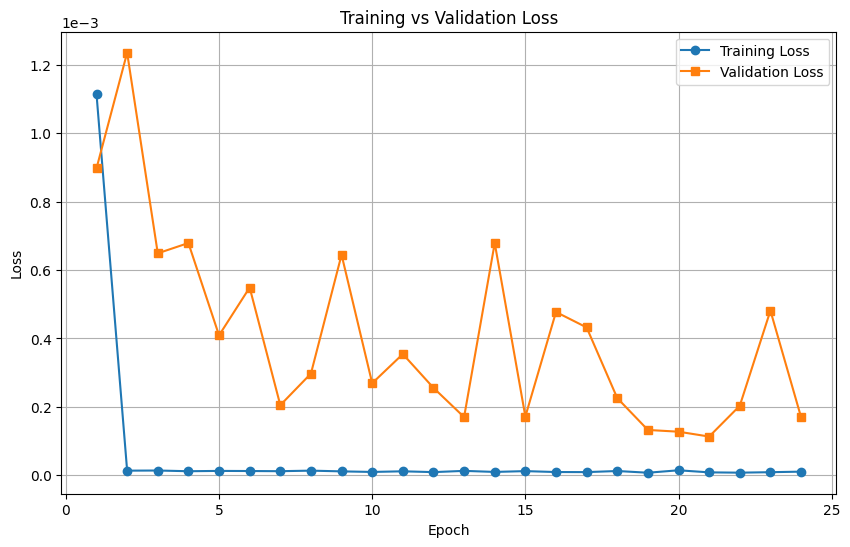

In [4]:
plotLoss(trainLoss, EvalLoss)

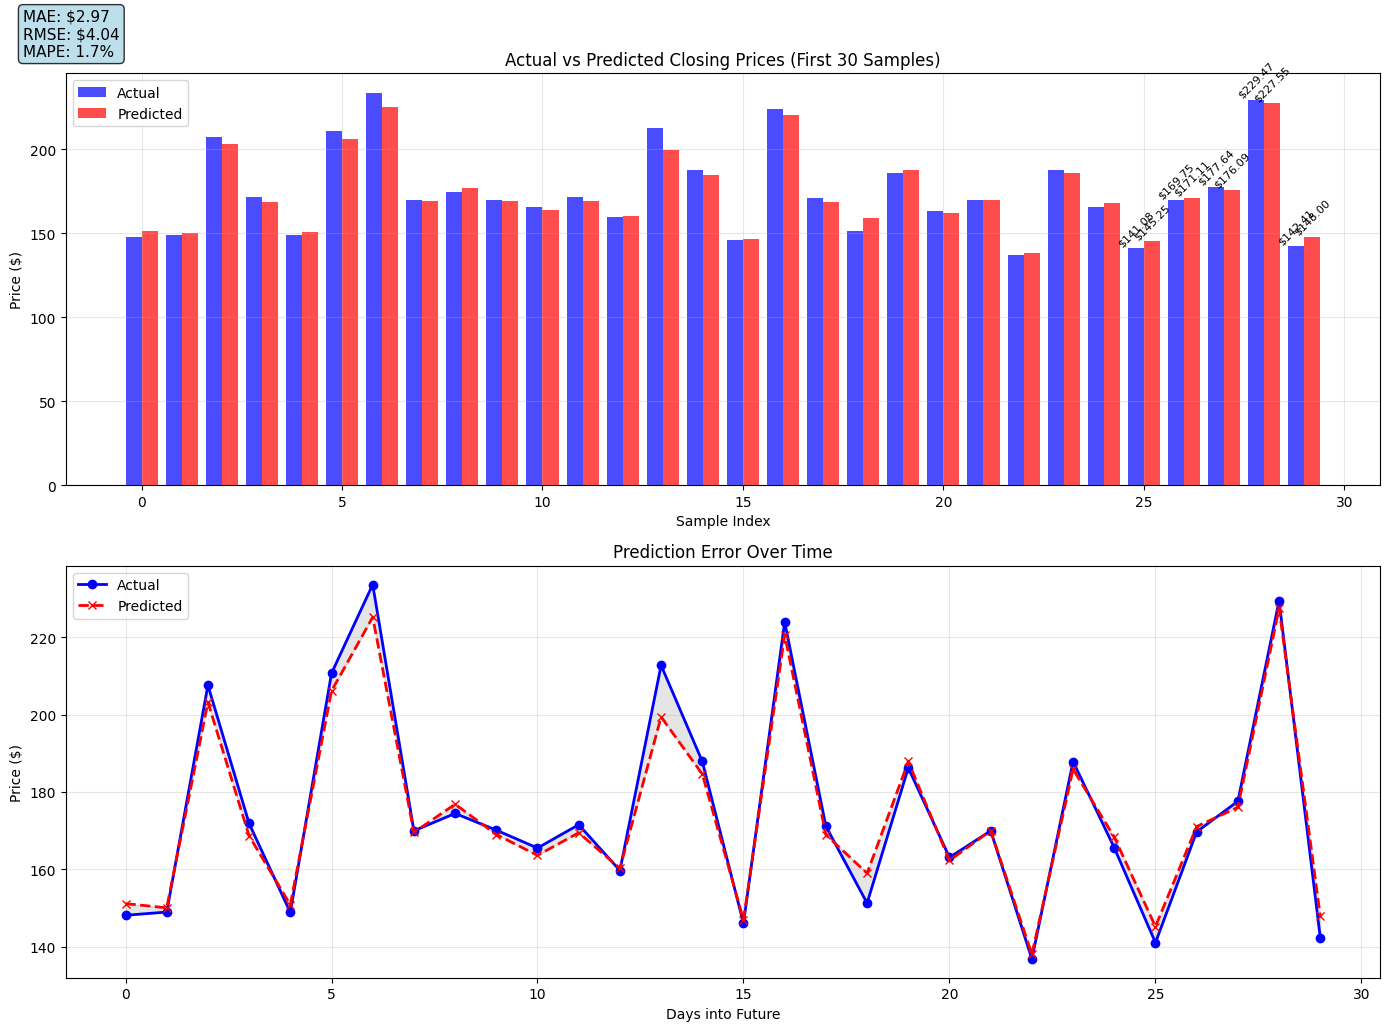

In [5]:
results = predictTestSet(model, testLoader, DEVICE, dataset)
metrics = plotPredictionsVsActual(results, numSamples=30)

DIAGNOSTIC PLOT 1: Q-Q Plot (Normality Check)


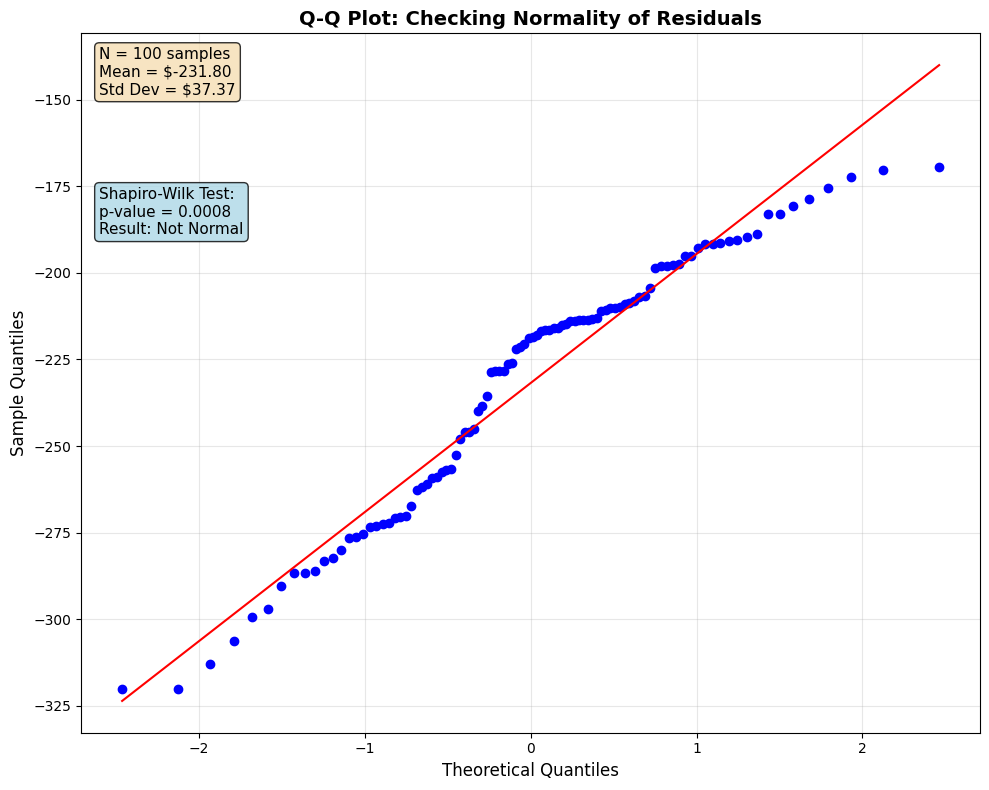


DIAGNOSTIC PLOT 2: Residuals vs Actual Values


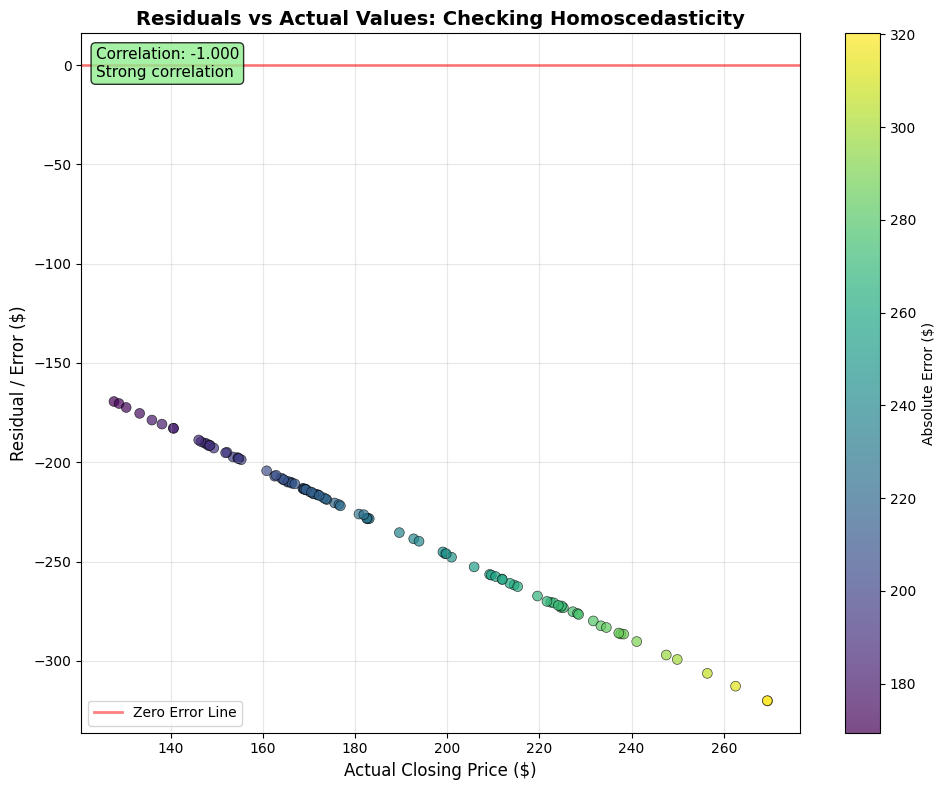


DIAGNOSTIC PLOT 3: Residuals vs Predicted Values


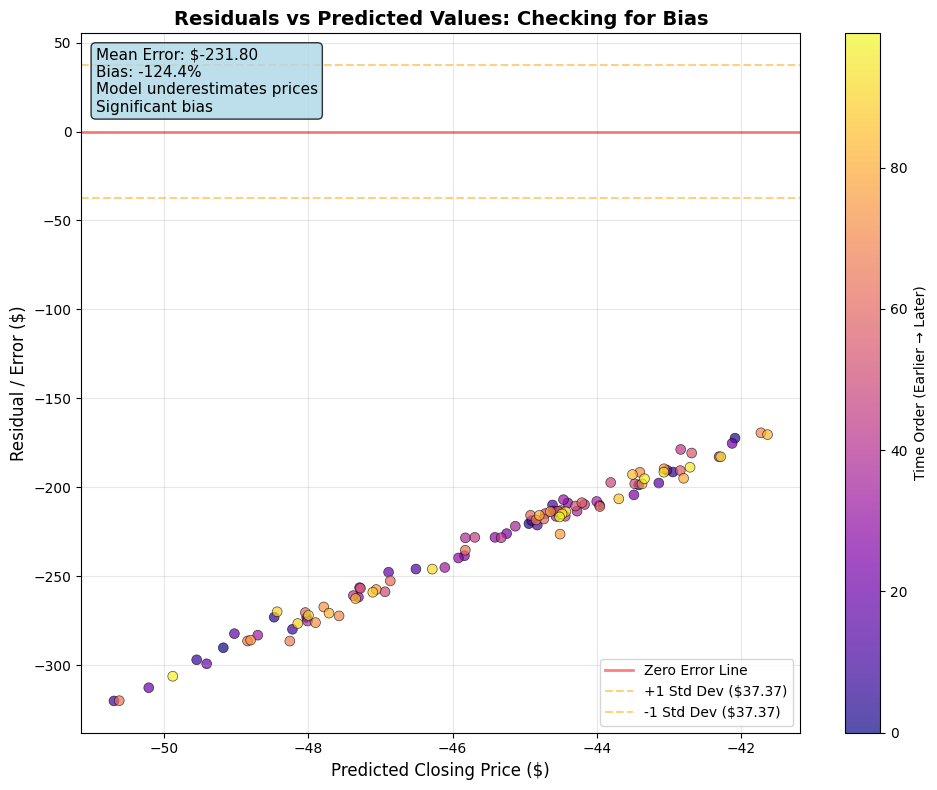


DIAGNOSTIC PLOT 4: Distribution of Residuals


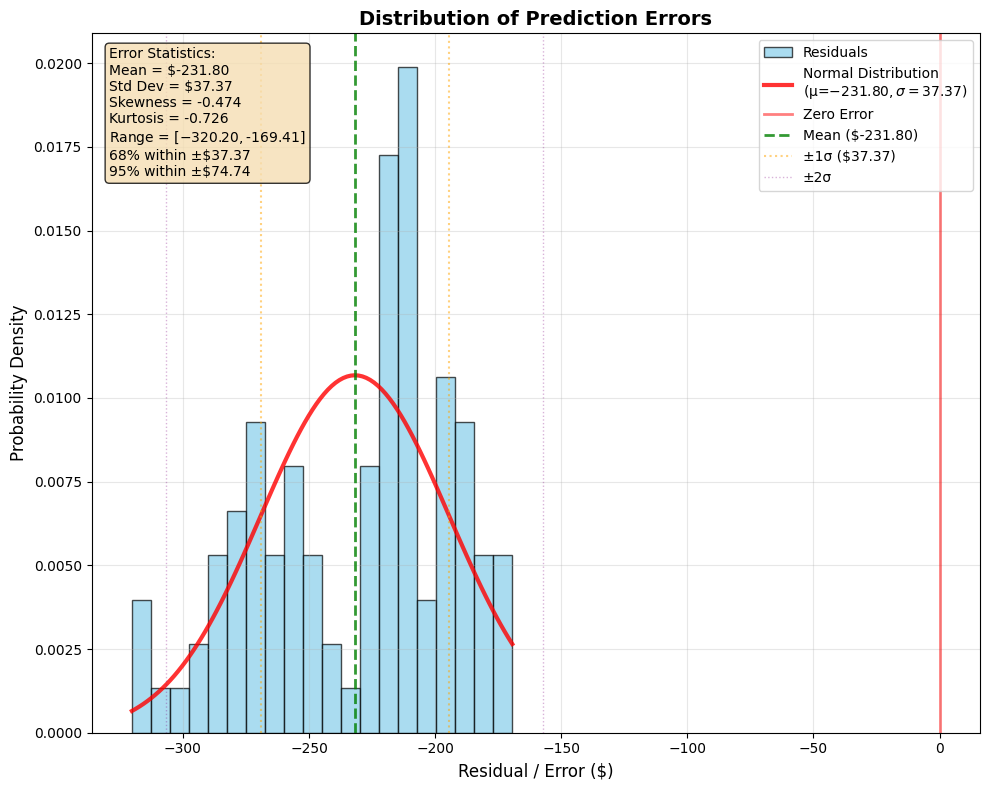

In [6]:
print("="*60)
print("DIAGNOSTIC PLOT 1: Q-Q Plot (Normality Check)")
print("="*60)
residuals1 = plotQQResiduals(testLoader, dataset, p, a)

print("\n" + "="*60)
print("DIAGNOSTIC PLOT 2: Residuals vs Actual Values")
print("="*60)
actuals, residuals2 = plotResidualsVsActual(testLoader, dataset, p, a)

print("\n" + "="*60)
print("DIAGNOSTIC PLOT 3: Residuals vs Predicted Values")
print("="*60)
predictions, residuals3 = plotResidualsVsPredicted(testLoader, dataset, p, a)

print("\n" + "="*60)
print("DIAGNOSTIC PLOT 4: Distribution of Residuals")
print("="*60)
residuals4 = plotResidualDistribution(testLoader, dataset, p, a)

e:\coding\python\stock-market-predictor\src\Graphs\plotFuturePredGraph.py:73: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro--" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(predictionIndices, predictions, 'ro--',


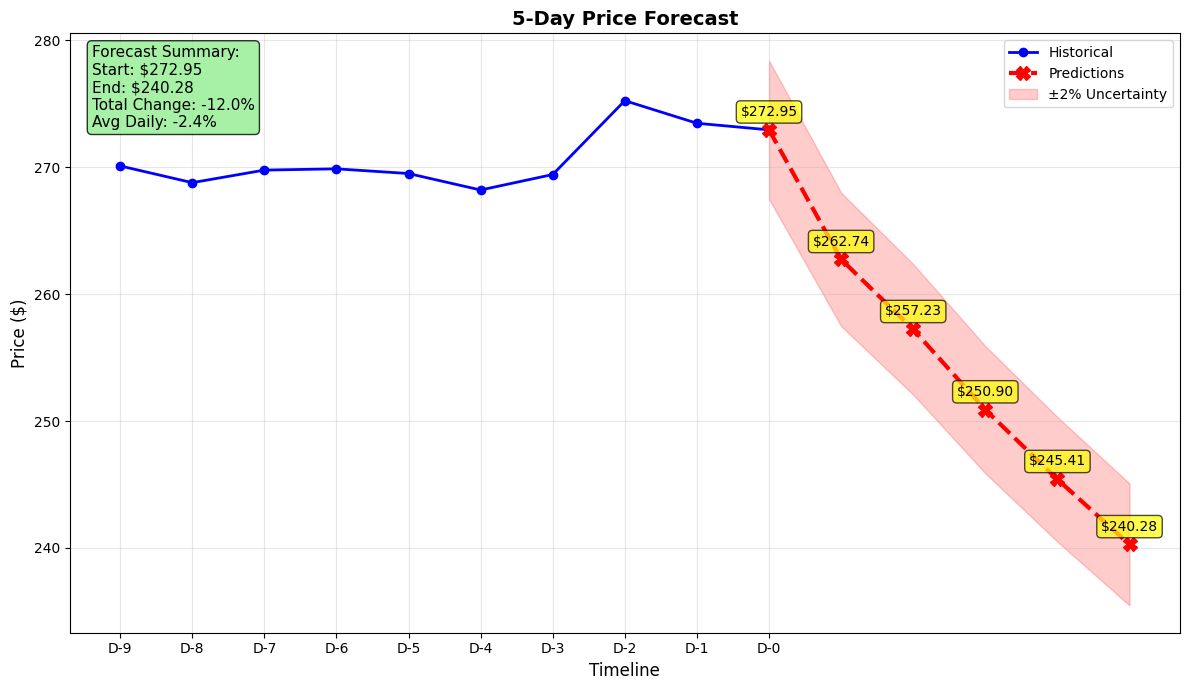

[272.95000596718086,
 262.7421317301837,
 257.22784148396164,
 250.8989273238979,
 245.40893365519423,
 240.2762570627484]

In [7]:
plotFuturePredictions(model, dataset, DEVICE)

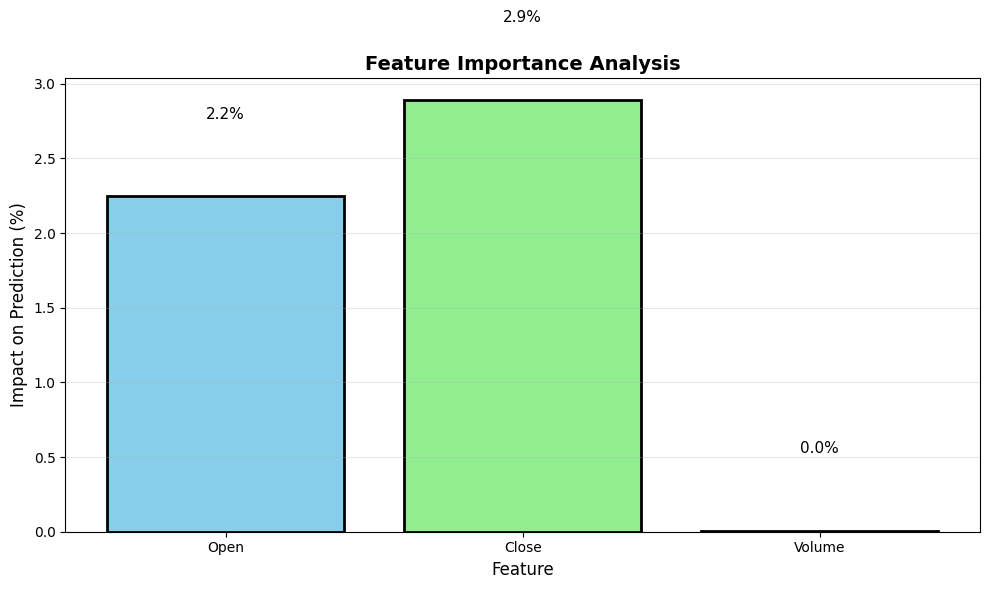

{'Open': 2.2459336010367212,
 'Close': 2.8931869294111494,
 'Volume': 0.004271244355855673}

In [8]:
plotFeatureImportance(model, dataset,DEVICE)